In [29]:
import numpy as np
from torch.utils.data import TensorDataset, random_split
import pandas as pd
import matplotlib.pyplot as plt
import torch
torch.__version__

'2.8.0+cu126'

In [30]:
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [31]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend()

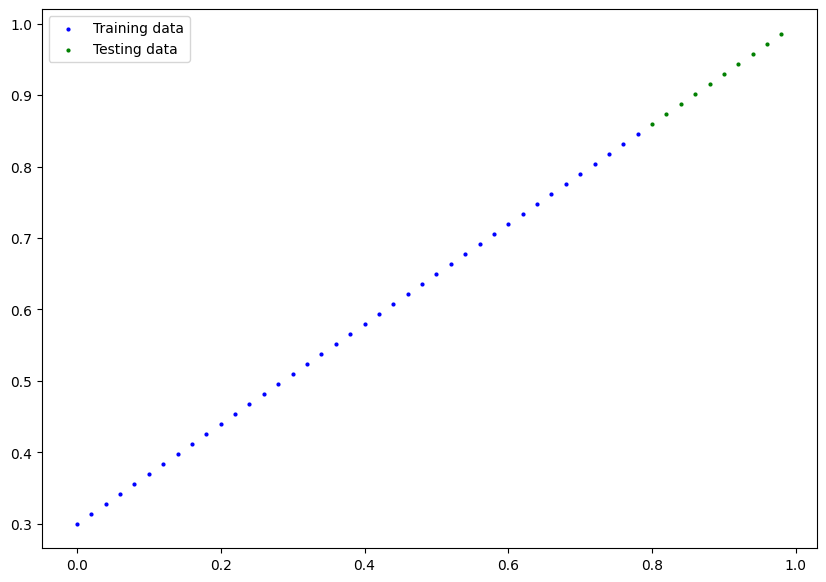

In [32]:
plot_predictions()

In [33]:
from torch import nn
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1 , requires_grad = True , dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True , dtype = torch.float))
  def forward (self , x:torch.Tensor)  -> torch.Tensor:
    return x*self.weight + self.bias


In [34]:
torch.manual_seed(22)
model_0 = LinearRegression()
print(model_0.state_dict())

OrderedDict({'weight': tensor([1.0302]), 'bias': tensor([-0.5073])})


In [35]:
with torch.inference_mode():
    y_preds = model_0(X_test)

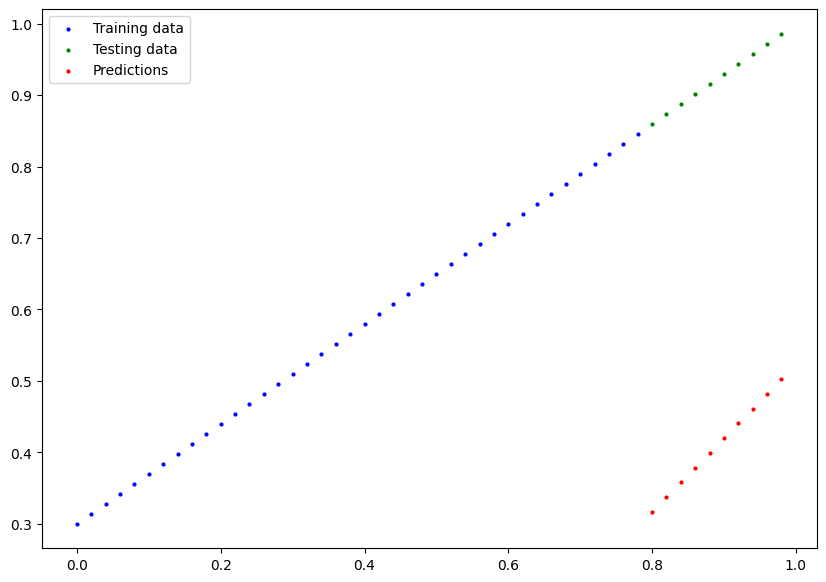

In [36]:
plot_predictions(predictions=y_preds)

In [37]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)


In [38]:
epochs = 400
train_loss_values = []
test_loss_values = []
epoch_count = []
for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred , y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.6784840822219849 | MAE Test Loss: 0.4999006390571594 
Epoch: 10 | MAE Train Loss: 0.5632740259170532 | MAE Test Loss: 0.3651902675628662 
Epoch: 20 | MAE Train Loss: 0.4480639100074768 | MAE Test Loss: 0.23047995567321777 
Epoch: 30 | MAE Train Loss: 0.3328537344932556 | MAE Test Loss: 0.0957694798707962 
Epoch: 40 | MAE Train Loss: 0.21764349937438965 | MAE Test Loss: 0.03997509926557541 
Epoch: 50 | MAE Train Loss: 0.1398780643939972 | MAE Test Loss: 0.1398012340068817 
Epoch: 60 | MAE Train Loss: 0.11666318029165268 | MAE Test Loss: 0.18705427646636963 
Epoch: 70 | MAE Train Loss: 0.10744699090719223 | MAE Test Loss: 0.20911923050880432 
Epoch: 80 | MAE Train Loss: 0.10226187855005264 | MAE Test Loss: 0.21685922145843506 
Epoch: 90 | MAE Train Loss: 0.09821927547454834 | MAE Test Loss: 0.21827499568462372 
Epoch: 100 | MAE Train Loss: 0.09469114243984222 | MAE Test Loss: 0.21412387490272522 
Epoch: 110 | MAE Train Loss: 0.0911630317568779 | MAE Test Loss

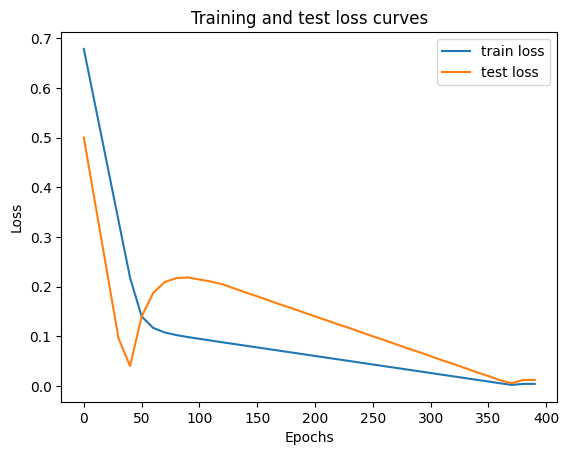

In [39]:
plt.plot(epoch_count , train_loss_values , label= 'train loss')
plt.plot(epoch_count , test_loss_values , label= 'test loss')
plt.title('Training and test loss curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [40]:
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weight': tensor([0.7047]), 'bias': tensor([0.2942])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


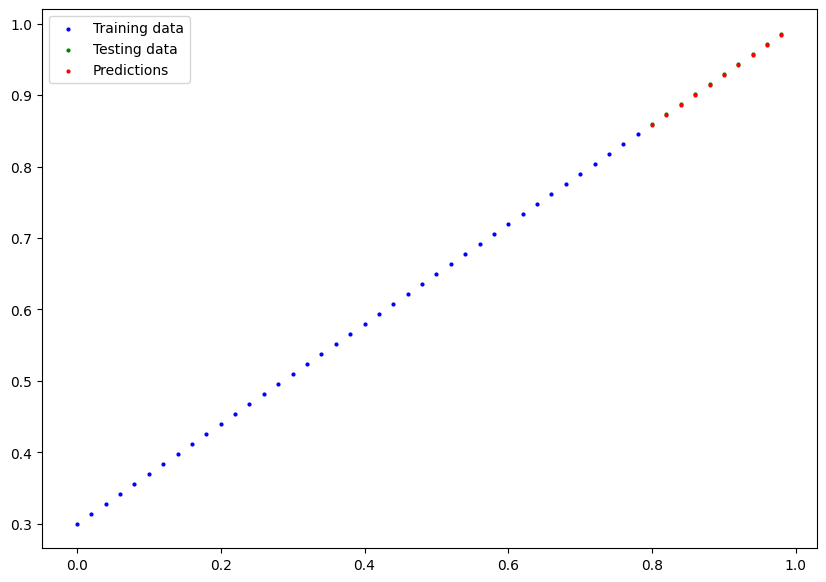

In [41]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
plot_predictions(predictions=y_preds)

In [42]:
torch.save(model_0.state_dict(), "model_weights.pth")

In [43]:
loaded_model = LinearRegression()

loaded_model.load_state_dict(torch.load("model_weights.pth"))

<All keys matched successfully>

In [44]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.7047])), ('bias', tensor([0.2942]))])